1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use logistic model Regression. Try to apply different *solver* and *penalty* to find the best one.
5. Perform model on training set and test set
6. Measure performance of the model.
7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

- Age: This is the attribute that describes the age of the patient. There is data type $int64$, the highest value is 29, and the lowest is 77.
- Sex: This is the attribute indicating the gender of the patient, where 0 indicates male patient, 1 female patient.
- ChestPainType: This is the attribute that indicates the patient's chest pain level. With levels 0, 1, 2, and 3.
- RestingBP: This is the attribute that indicates the patient's blood pressure with data type $int64$, the value is in the range [94, 200]
- Cholesterol: This attribute indicates the patient's cholesterol level as measured in the hospital. Has the data type $int64$, where the value is in [126, 564]
- FastingBS: This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl sugar = 1, otherwise = 0.
- RestingECG: This property displays the results of the ECG from 0 to 2 (0, 1, 2). Where each value indicates the severity of the pain.
- thalach: Patient's highest heart rate
- ExerciseAngina: Whether or not you have angina during exercise. Yes denotes 1, no denotes 0.
- Oldpeak: Attribute expressing the stress level of the patient. Has a value of type $float64$, the value is in [0, 6.2]
- ST\_Slope: Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to [0, 1, 2].
- ca: number of major vessels (0-3) colored by flourosopy - given
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- HeartDisease: Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

## Load Dataset

In [1]:
import pandas as pd
PATH = "heart.csv" # Path to your file

df = pd.read_csv(PATH)
#ToDo: Show histogram of dataframe
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
882,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
883,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
884,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

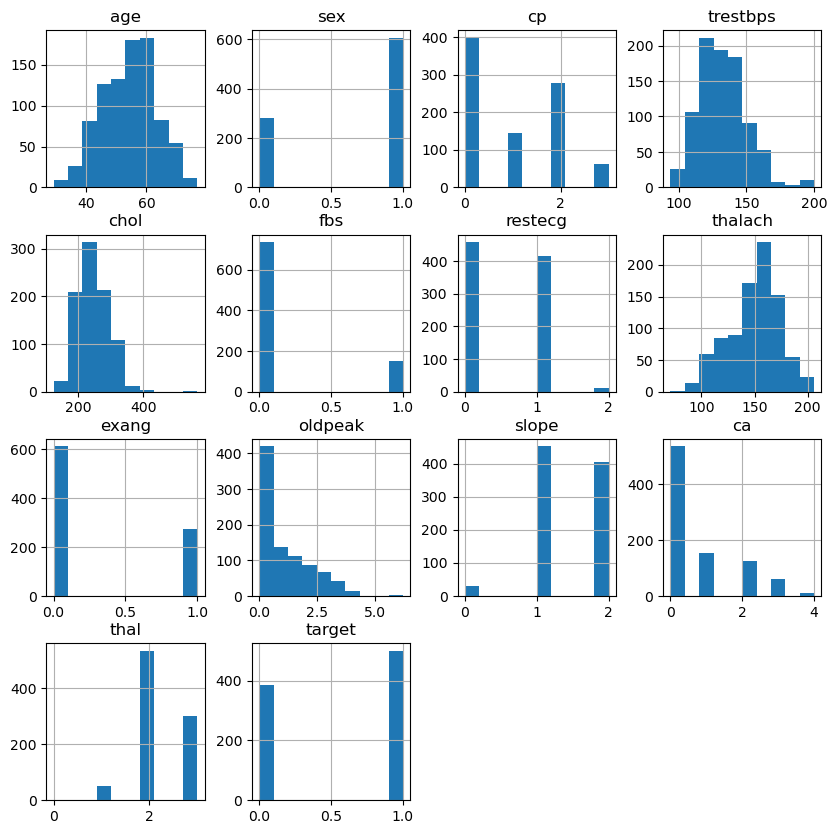

In [2]:
continous_columns = df.describe().columns
df.hist(column=continous_columns, figsize=(10, 10))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


In [4]:
df.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     46    1   0       120   249    0        0      144      0      0.8   
1     71    0   1       160   302    0        1      162      0      0.4   
2     71    0   1       160   303    0        1      163      0      0.4   
3     71    0   1       160   304    0        1      164      0      0.4   
4     71    0   1       160   305    0        1      165      0      0.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
881   68    0   2       120   211    0        0      115      0      1.5   
882   44    0   2       108   141    0        1      175      0      0.6   
883   52    1   0       128   255    0        1      161      1      0.0   
884   59    1   3       160   273    0        0      125      0      0.0   
885   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   0     3  

## Data Analysis

In [5]:
# Data analysis
# Todo: analyze your data here

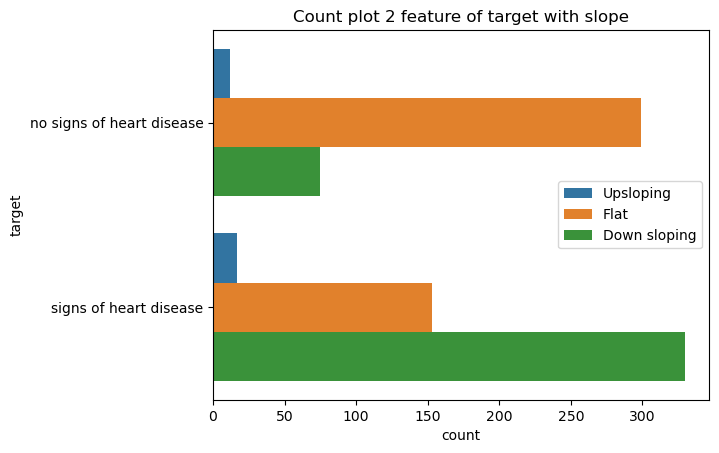

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
label = ['no signs of heart disease','signs of heart disease']
yr = sns.countplot(y="target", data=df, hue = 'slope')
yr.set_yticklabels(label,rotation = 0)
plt.title('Count plot 2 feature of target with slope')
plt.legend(['Upsloping','Flat','Down sloping'])


imblance data of target:  114


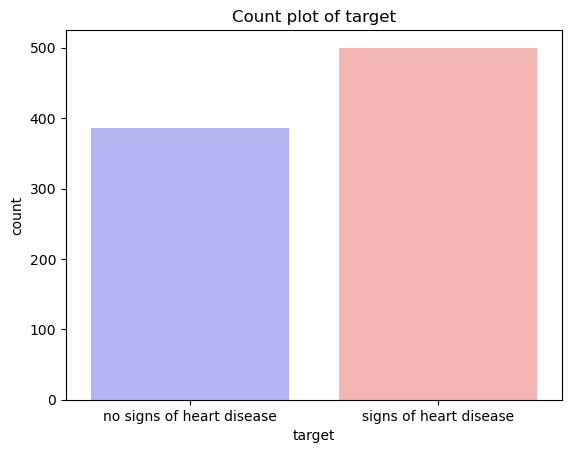

In [7]:
label = ['no signs of heart disease','signs of heart disease']
yr = sns.countplot(x="target", data=df, palette="bwr", label = label)
yr.set_xticklabels(label,rotation = 0)
plt.title('Count plot of target')
print('imblance data of target: ',df['target'].value_counts()[1] - df['target'].value_counts()[0])

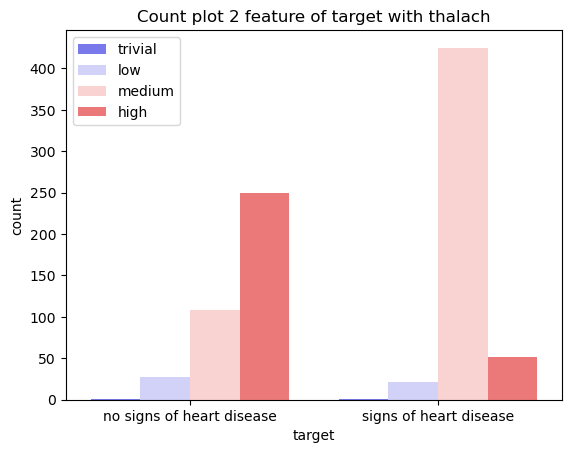

In [8]:
label = ['no signs of heart disease','signs of heart disease']
yr = sns.countplot(x="target", data=df, hue = 'thal',palette="bwr" )
yr.set_xticklabels(label,rotation = 0)
plt.title('Count plot 2 feature of target with thalach')
plt.legend(['trivial','low','medium','high'])

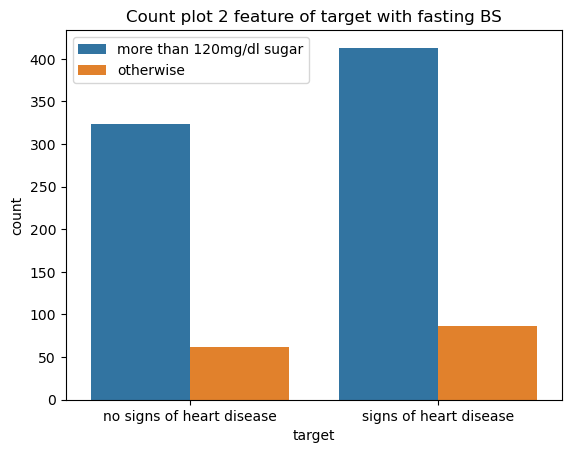

In [9]:
label = ['no signs of heart disease','signs of heart disease']
yr = sns.countplot(x="target", data=df, hue = 'fbs')
yr.set_xticklabels(label,rotation = 0)
plt.title('Count plot 2 feature of target with fasting BS')
plt.legend(['more than 120mg/dl sugar','otherwise'])

## Preprocessing

In [10]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df = df.dropna()
    return df

In [11]:
df = preprocessing_data(df.copy())
print(df.isnull().sum())
df

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
882,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
883,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
884,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


## Feature Engineering

In [12]:
#Check the type of object in the data
for col in df.columns: #tự động hóa cho mỗi cột dữ liệu được chuyển sang category
    if(df.dtypes[col]=='O'):  #lý do sử dụng dòng for là bởi vì khi những dữ liệu thực tế thì sẽ có khá là nhiều những cột cần phải chuyển sang category 
        k = 1
    else:
        k = 0
if (k == 1):
    print('Have a type of object')
else:
    print('Non have a type of object')

Non have a type of object


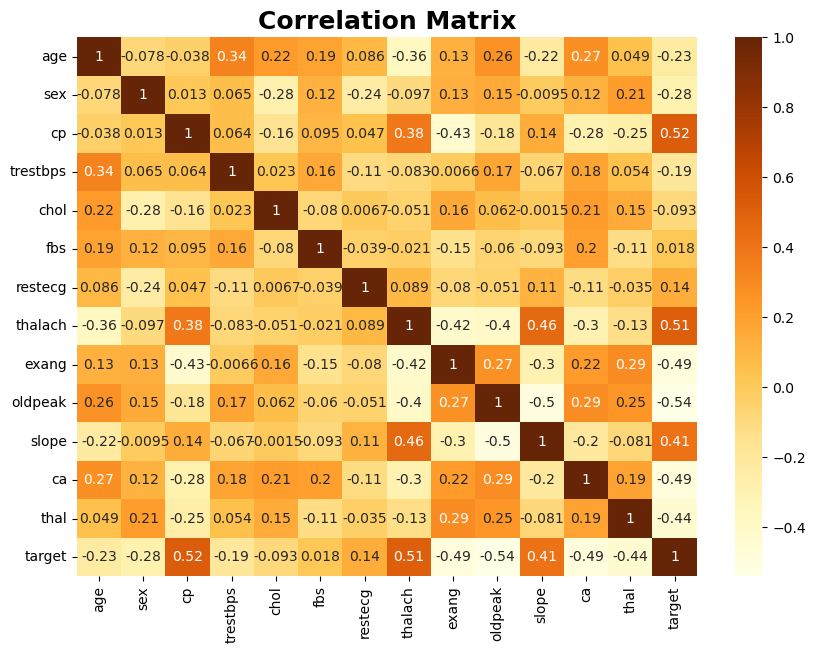

In [13]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    df = df.copy()
    return df

df = apply_feature_engineering(df)
plt.figure(figsize=(10,7))
corrmat = df.corr()
colormap=sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(data=corrmat,annot=True, cmap=colormap)
plt.title('Correlation Matrix', fontsize=18, fontweight="bold")
plt.yticks(rotation=0)
plt.show() # Show heatmap after normalized data

In [14]:
import numpy as np
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop('target', axis=1, inplace=False).values# Todo: Select features
    y = df['target']# Todo: Select label
    y = np.array(y)

    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [15]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 101
TRAIN_SIZE = 0.8

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,  mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
lr_params = {
    "penalty": ["l2", "l1", "elasticnet", None],
    "C": np.logspace(-4, 4, 10),
    "l1_ratio": [stats.uniform(0, 1)],
    "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}
grid = GridSearchCV(LogisticRegression(),param_grid = lr_params)
grid.fit(trainX,trainY)
print('The parameters combination that would give best accuracy is : ')
print(grid.best_params_)

The parameters combination that would give best accuracy is : 
{'C': 2.782559402207126, 'l1_ratio': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002218CDBF070>, 'penalty': 'l2', 'solver': 'liblinear'}


In [17]:

def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    # Todo: Input your scaler and logistic model into pipeline
    model = make_pipeline(StandardScaler(),LogisticRegression(penalty = 'l2', solver = 'liblinear'))
    # Todo: fit your model with X, y
    model.fit(X,y)
    return model

def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("Precision: ", precision_score(y_true , y_pred))
    print("Recall: ", recall_score(y_true , y_pred ))
    print("F1: ", f1_score(y_true , y_pred))
    print("Confusion matrix: \n", confusion_matrix(y_true , y_pred ))
    print("classification_report: \n", classification_report(y_true, y_pred))

    # Todo: Only choose one of them as your score for the question 7
    main_score = confusion_matrix(y_true , y_pred )
    return main_score

model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

mean absolute error of linear model on train set  0.04096045197740113
mean absolute error of linear model on test set  0.06179775280898876


In [18]:
print('Score of train data : ',model.score(trainX, trainY))
print('Score of test data : ',model.score(testX, testY))

Score of train data :  0.9590395480225988
Score of test data :  0.9382022471910112


In [19]:
y_pred = model.predict(testX)  
calculate_performance(testY, y_pred)

Accuracy:  0.9382022471910112
Precision:  0.9245283018867925
Recall:  0.9702970297029703
F1:  0.9468599033816426
Confusion matrix: 
 [[69  8]
 [ 3 98]]
classification_report: 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        77
           1       0.92      0.97      0.95       101

    accuracy                           0.94       178
   macro avg       0.94      0.93      0.94       178
weighted avg       0.94      0.94      0.94       178



array([[69,  8],
       [ 3, 98]], dtype=int64)

In [20]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    calculate_performance(testY, y_pred)
    return "7.confusion_matrix, lý do vì có thể trực quan hóa dạng bảng của nhãn true và so với lại nhãn pred, làm tăng thêm khả năng nhìn nhận vấn đề nhanh chóng và chính xác hơn của người làm dữ liệu.lớp tích cực đúng (TP) biểu thị rằng có bao nhiêu nhãn YES được dự đoán chính xác. lớp phủ định đúng TN biểu thị cho biết có bao nhiêu mẫu NO được dự đoán chính xác, giúp nhìn thấy vấn đề sâu hơn trong mô hình và các vấn đề thực tiễn." \
           " Other conclusion: penalty : l2, solver : liblinear"

In [21]:
get_conclusion()

Accuracy:  0.9382022471910112
Precision:  0.9245283018867925
Recall:  0.9702970297029703
F1:  0.9468599033816426
Confusion matrix: 
 [[69  8]
 [ 3 98]]
classification_report: 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        77
           1       0.92      0.97      0.95       101

    accuracy                           0.94       178
   macro avg       0.94      0.93      0.94       178
weighted avg       0.94      0.94      0.94       178



'7.confusion_matrix, lý do vì có thể trực quan hóa dạng bảng của nhãn true và so với lại nhãn pred, làm tăng thêm khả năng nhìn nhận vấn đề nhanh chóng và chính xác hơn của người làm dữ liệu.lớp tích cực đúng (TP) biểu thị rằng có bao nhiêu nhãn YES được dự đoán chính xác. lớp phủ định đúng TN biểu thị cho biết có bao nhiêu mẫu NO được dự đoán chính xác, giúp nhìn thấy vấn đề sâu hơn trong mô hình và các vấn đề thực tiễn. Other conclusion: penalty : l2, solver : liblinear'